In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from random import random, seed
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.available
import load_data as ld
import classes as cl
import pandas as pd
from sklearn.model_selection import train_test_split

## Own code classification

In [2]:

# Prepare the dataset
data = pd.read_csv('../../data/Wisconsin.csv')

# Select features and target (radius_mean and texture_mean, diagnosis)
X = data[['radius_mean', 'texture_mean']].values
y = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).values.reshape(-1, 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


# Standardize the data. It does not make sense to standardize/scale the y values because they are binary.
X_train, X_test = f.scale_train_test(X_train, X_test)

# Set layer sizes: 2 (input), 16 (hidden), 8 (hidden), 1 (output)
input_size = 2
layer_sizes = [12, 12, 1]

activation_funcs = [f.ReLU, f.ReLU, f.sigmoid]
activation_ders = [f.ReLU_derivative, f.ReLU_derivative, f.sigmoid_derivative]

# Define learning rates and epochs to test
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epochs_list = [900, 925, 950, 975, 1000]

# Initialize an array to store accuracy values
accuracy_array = np.zeros((len(learning_rates), len(epochs_list)))

for j, epoch in enumerate(epochs_list):
    for i, lr in enumerate(learning_rates):
        # Initialize layers and activation functions
        layers = f.create_layers_batch(input_size, layer_sizes)
        
        # Train the neural network
        trained_layers = f.train_network(X_train, y_train, layers, activation_funcs, activation_ders, f.bce, f.bce_derivative, lr, epoch)
    
        # Predict on test data
        y_pred = f.feed_forward_batch(X_test, trained_layers, activation_funcs)
        y_pred_classes = (y_pred > 0.5).astype(int)
    
        # Calculate accuracy
        accuracy = np.mean(y_pred_classes == y_test)
        print(f"Learning Rate: {lr}, Epochs: {epoch}, Accuracy: {accuracy:.4f}")
    
        # Store the accuracy in the array
        accuracy_array[i, j] = accuracy

Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (1, 12), b shape = (1,)
Epoch 0, Loss: 4.164963651862026
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (1, 12), b shape = (1,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (1, 12), b shape = (1,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (1, 12), b shape = (1,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (1, 12), b shape = (1,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (1, 12), b shape = (1,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (1, 12), b shape = (1,)
Layer 0: W shape = (12, 2), b shape = (12,)

In [3]:
f.plot_accuracy_vs_learning_rate(accuracy_array, learning_rates, epochs_list, "Classification accuracy with Sigmoid as output function", "OwnNNClassificationSigmoidLast")

## Softmax as last layer

In [4]:

# Prepare the dataset
data = pd.read_csv('../../data/Wisconsin.csv')

# Select features and target (radius_mean and texture_mean, diagnosis)
X = data[['radius_mean', 'texture_mean']].values
y = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).values.reshape(-1, 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


# Standardize the data. It does not make sense to standardize/scale the y values because they are binary.
X_train, X_test = f.scale_train_test(X_train, X_test)

# Set layer sizes: 2 (input), 16 (hidden), 8 (hidden), 1 (output)
input_size = 2
layer_sizes = [12, 12, 2]

activation_funcs = [f.ReLU, f.ReLU, f.softmax]
activation_ders = [f.ReLU_derivative, f.ReLU_derivative, None] #Removing the softmax derivative to increase numerical stability.

# One-hot encode labels
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

# Define learning rates and epochs to test
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epochs_list = [900, 925, 950, 975, 1000]

# Initialize an array to store accuracy values
accuracy_array = np.zeros((len(learning_rates), len(epochs_list)))

for j, epoch in enumerate(epochs_list):
    for i, lr in enumerate(learning_rates):
        # Initialize layers and activation functions
        layers = f.create_layers_batch(input_size, layer_sizes)
        
        # Train the neural network
        trained_layers = f.train_network(X_train, y_train_one_hot, layers, activation_funcs, activation_ders, f.ce, f.ce_derivative, lr, epoch)
    
        # Predicting and evaluating
        y_pred = f.feed_forward_batch(X_test, trained_layers, activation_funcs)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = y_test.flatten()
        accuracy = np.mean(y_pred_classes == y_test_classes)
        print(f"Learning Rate: {lr}, Epochs: {epoch}, Accuracy: {accuracy:.4f}")
    
        # Store the accuracy in the array
        accuracy_array[i, j] = accuracy

Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (2, 12), b shape = (2,)
Epoch 0, Loss: 14.4777571246576
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (2, 12), b shape = (2,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (2, 12), b shape = (2,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (2, 12), b shape = (2,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (2, 12), b shape = (2,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (2, 12), b shape = (2,)
Layer 0: W shape = (12, 2), b shape = (12,)
Layer 1: W shape = (12, 12), b shape = (12,)
Layer 2: W shape = (2, 12), b shape = (2,)
Layer 0: W shape = (12, 2), b shape = (12,)


In [5]:
f.plot_accuracy_vs_learning_rate(accuracy_array, learning_rates, epochs_list, "Classification accuracy with Softmax as output function", "OwnNNClassificationSoftmaxLast")

## Pytorch code classification

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd


X, y = ld.load_wisconsin_data()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Set model parameters
input_size = X_train.shape[1]
hidden_size1 = 12
hidden_size2 = 12
output_size = 1

learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epochs_list = [900, 925, 950, 975, 1000]

# Initialize an array to store accuracy values
accuracy_array = np.zeros((len(learning_rates), len(epochs_list)))

for j, num_epochs in enumerate(epochs_list):
    for i, lr in enumerate(learning_rates):
        # Initialize the model with specified activation functions
        model = cl.RegClasNN(
            input_size, hidden_size1, hidden_size2, output_size,
            activation_function=nn.ReLU(),
            last_layer_activation=nn.Sigmoid()
        )
        criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train the model
        for epoch in range(num_epochs):
            model.train()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Optionally, print loss every 100 epochs
            # if (epoch+1) % 100 == 0:
            #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            y_pred_classes = (y_pred > 0.5).float()

        # Convert to numpy arrays and flatten
        y_test_np = y_test.numpy().flatten()
        y_pred_classes_np = y_pred_classes.numpy().flatten()

        # Calculate accuracy
        accuracy = accuracy_score(y_test_np, y_pred_classes_np)
        print(f"Learning Rate: {lr}, Epochs: {num_epochs}, Accuracy: {accuracy:.4f}")

        # Store the accuracy in the array
        accuracy_array[i, j] = accuracy



Learning Rate: 1e-05, Epochs: 900, Accuracy: 0.5965
Learning Rate: 0.0001, Epochs: 900, Accuracy: 0.9035
Learning Rate: 0.001, Epochs: 900, Accuracy: 0.9123
Learning Rate: 0.01, Epochs: 900, Accuracy: 0.9035
Learning Rate: 0.1, Epochs: 900, Accuracy: 0.9386
Learning Rate: 1e-05, Epochs: 925, Accuracy: 0.4649
Learning Rate: 0.0001, Epochs: 925, Accuracy: 0.8772
Learning Rate: 0.001, Epochs: 925, Accuracy: 0.9123
Learning Rate: 0.01, Epochs: 925, Accuracy: 0.8860
Learning Rate: 0.1, Epochs: 925, Accuracy: 0.8947
Learning Rate: 1e-05, Epochs: 950, Accuracy: 0.7982
Learning Rate: 0.0001, Epochs: 950, Accuracy: 0.8772
Learning Rate: 0.001, Epochs: 950, Accuracy: 0.9035
Learning Rate: 0.01, Epochs: 950, Accuracy: 0.9211
Learning Rate: 0.1, Epochs: 950, Accuracy: 0.9211
Learning Rate: 1e-05, Epochs: 975, Accuracy: 0.5965
Learning Rate: 0.0001, Epochs: 975, Accuracy: 0.8684
Learning Rate: 0.001, Epochs: 975, Accuracy: 0.9035
Learning Rate: 0.01, Epochs: 975, Accuracy: 0.9211
Learning Rate: 0.1

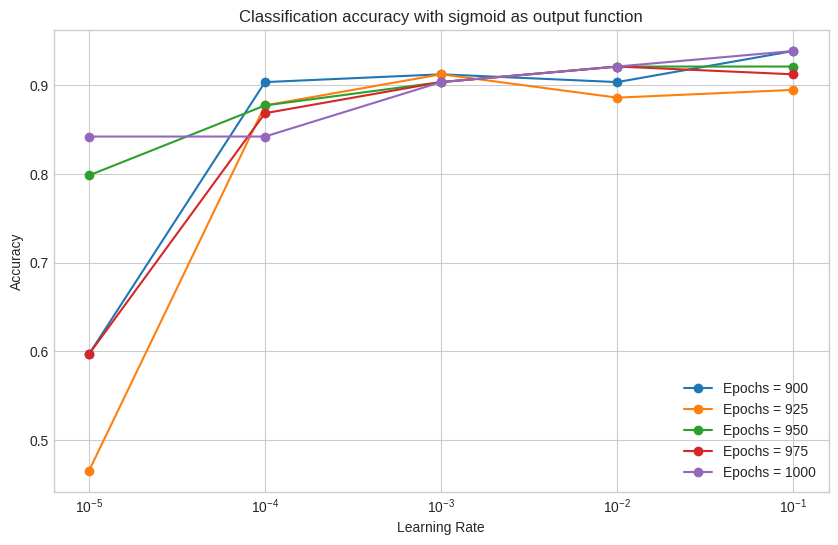

In [7]:
f.plot_accuracy_vs_learning_rate(accuracy_array, learning_rates, epochs_list, "Classification accuracy with sigmoid as output function", "PyTorchNNClassificationSigmoidLast")

## Pytorch Softmax as last layer

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np  # Ensure numpy is imported

X, y = ld.load_wisconsin_data()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Convert labels to torch tensors and one-hot encode
y_train = torch.tensor(y_train, dtype=torch.long).squeeze()
y_test = torch.tensor(y_test, dtype=torch.long).squeeze()

y_train_one_hot = nn.functional.one_hot(y_train, num_classes=2).float()
y_test_one_hot = nn.functional.one_hot(y_test, num_classes=2).float()

# Set model parameters
input_size = X_train.shape[1]
hidden_size1 = 12
hidden_size2 = 12
output_size = 2  # Two output neurons for softmax

learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epochs_list = [900, 925, 950, 975, 1000]

# Initialize an array to store accuracy values
accuracy_array = np.zeros((len(learning_rates), len(epochs_list)))

for j, num_epochs in enumerate(epochs_list):
    for i, lr in enumerate(learning_rates):
        # Initialize the model with softmax as the last activation function
        model = cl.RegClasNN(
            input_size, hidden_size1, hidden_size2, output_size,
            activation_function=nn.ReLU(),
            last_layer_activation=nn.Identity()) # Substituted nn.Softmax() with nn.Identity() to avoid numerical instability

        criterion = nn.CrossEntropyLoss()  # Use Binary Cross-Entropy Loss to avoid one-hot encoding and increase numerical stability
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train the model
        for epoch in range(num_epochs):
            model.train()
            outputs = model(X_train)  # Outputs are probabilities after softmax
            loss = criterion(outputs, y_train_one_hot)  # Use one-hot encoded labels

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)  # Outputs are probabilities
            y_pred_classes = torch.argmax(outputs, dim=1)

        # Convert to numpy arrays
        y_test_classes = y_test.numpy()
        y_pred_classes_np = y_pred_classes.numpy()

        # Calculate accuracy
        accuracy = accuracy_score(y_test_classes, y_pred_classes_np)
        print(f"Learning Rate: {lr}, Epochs: {num_epochs}, Accuracy: {accuracy:.4f}")

        # Store the accuracy in the array
        accuracy_array[i, j] = accuracy 

Learning Rate: 1e-05, Epochs: 900, Accuracy: 0.7018
Learning Rate: 0.0001, Epochs: 900, Accuracy: 0.8684
Learning Rate: 0.001, Epochs: 900, Accuracy: 0.9035
Learning Rate: 0.01, Epochs: 900, Accuracy: 0.9211
Learning Rate: 0.1, Epochs: 900, Accuracy: 0.9123
Learning Rate: 1e-05, Epochs: 925, Accuracy: 0.4474
Learning Rate: 0.0001, Epochs: 925, Accuracy: 0.8860
Learning Rate: 0.001, Epochs: 925, Accuracy: 0.9211
Learning Rate: 0.01, Epochs: 925, Accuracy: 0.9123
Learning Rate: 0.1, Epochs: 925, Accuracy: 0.9035
Learning Rate: 1e-05, Epochs: 950, Accuracy: 0.5965
Learning Rate: 0.0001, Epochs: 950, Accuracy: 0.8684
Learning Rate: 0.001, Epochs: 950, Accuracy: 0.9035
Learning Rate: 0.01, Epochs: 950, Accuracy: 0.8860
Learning Rate: 0.1, Epochs: 950, Accuracy: 0.9211
Learning Rate: 1e-05, Epochs: 975, Accuracy: 0.8860
Learning Rate: 0.0001, Epochs: 975, Accuracy: 0.8772
Learning Rate: 0.001, Epochs: 975, Accuracy: 0.9211
Learning Rate: 0.01, Epochs: 975, Accuracy: 0.9123
Learning Rate: 0.1

In [9]:
f.plot_accuracy_vs_learning_rate(accuracy_array, learning_rates, epochs_list, "Classification accuracy with Softmax as output function", "PyTorchNNClassificationSoftmaxLast")